<a href="https://colab.research.google.com/github/gaws15/AINotebooksVault/blob/main/po1_fluctuaitonPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Height (Layer 4): 4.17 mm
Standard Deviation (Layer 4): 0.49 mm
Coefficient of Variation (Layer 4): 11.77%


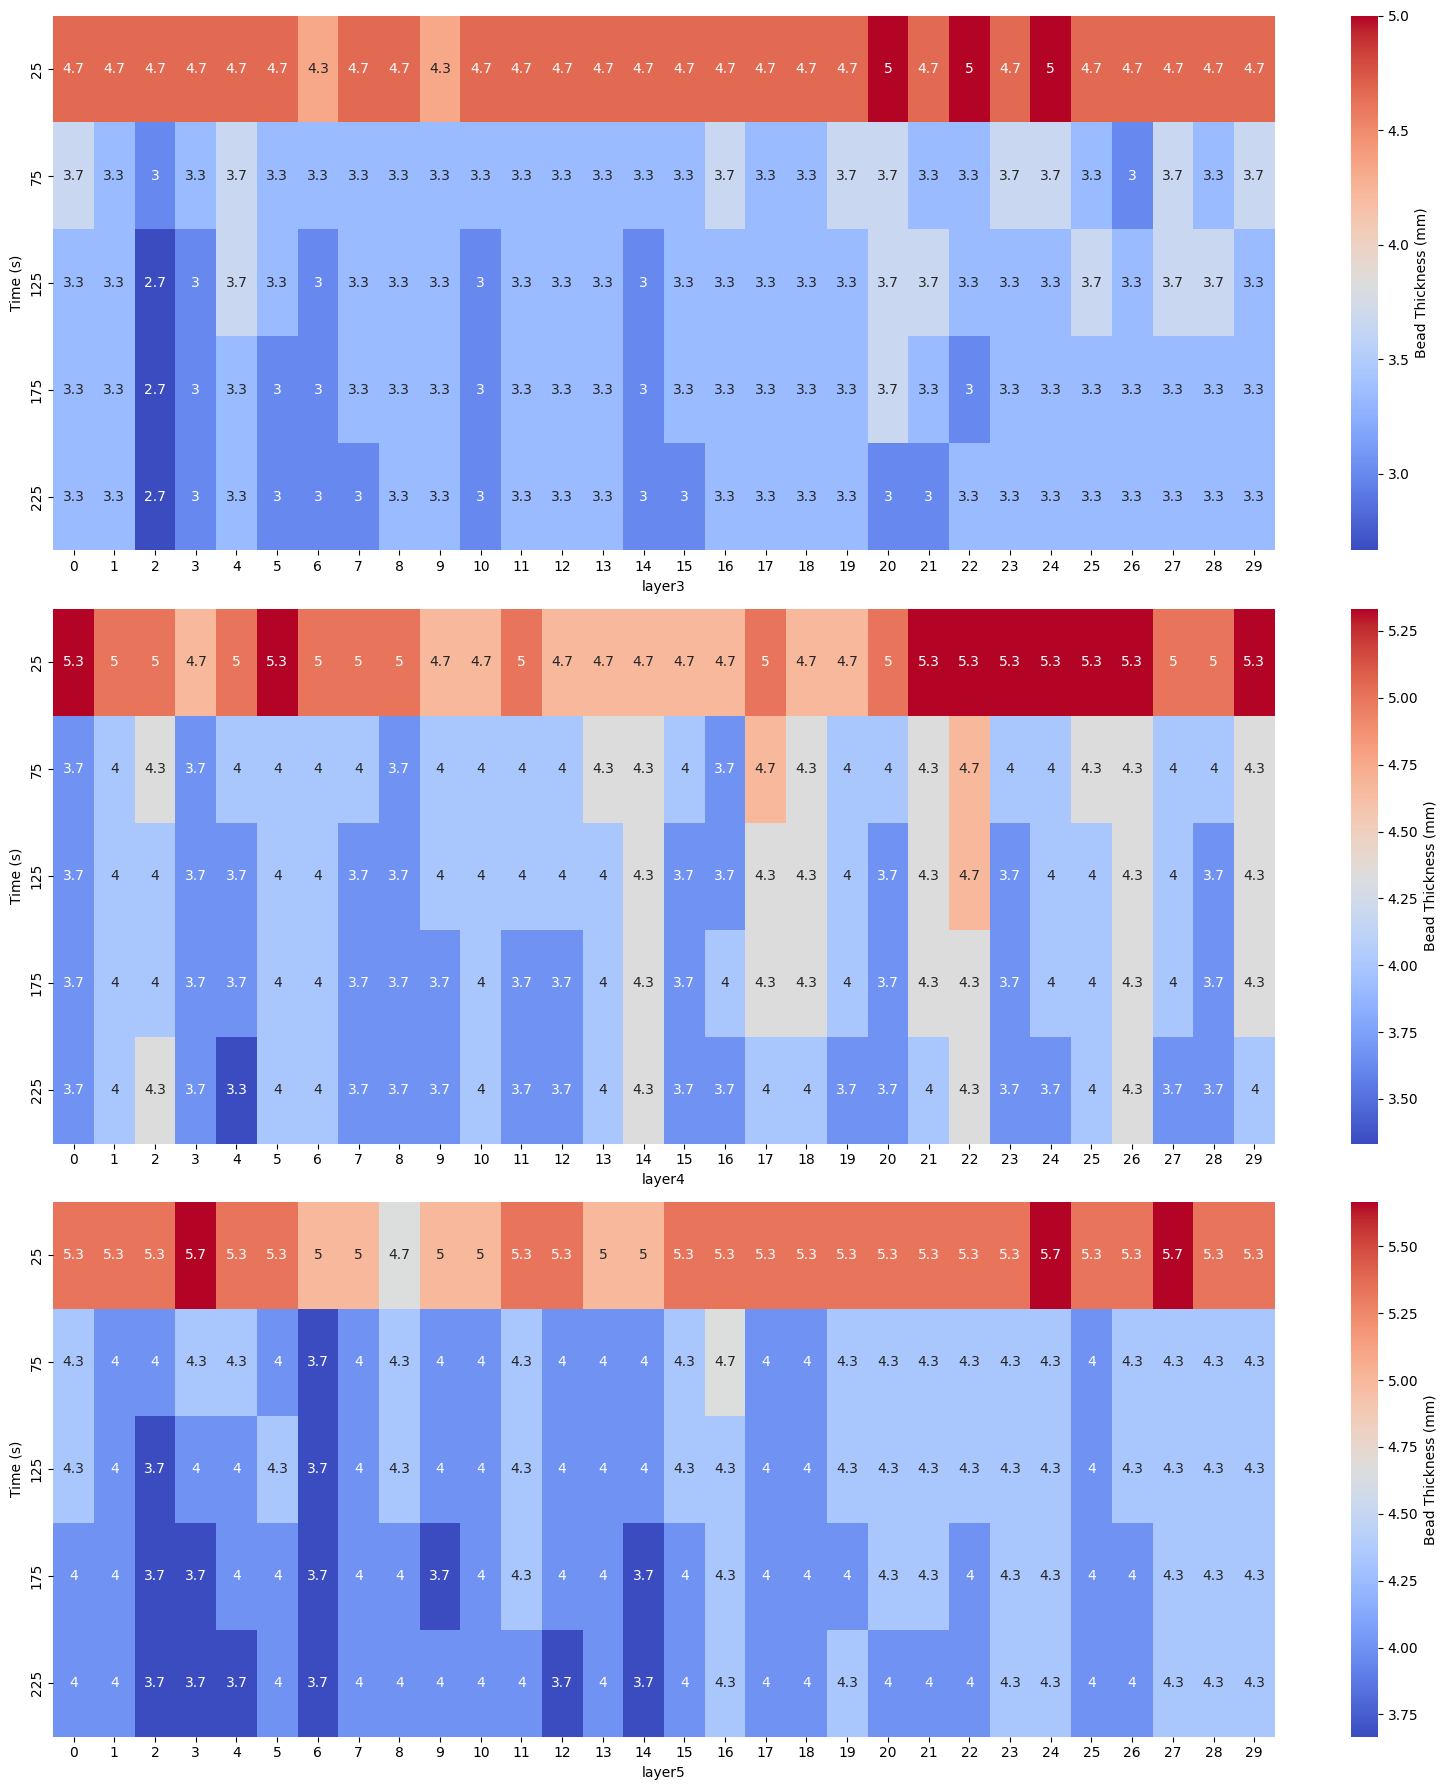

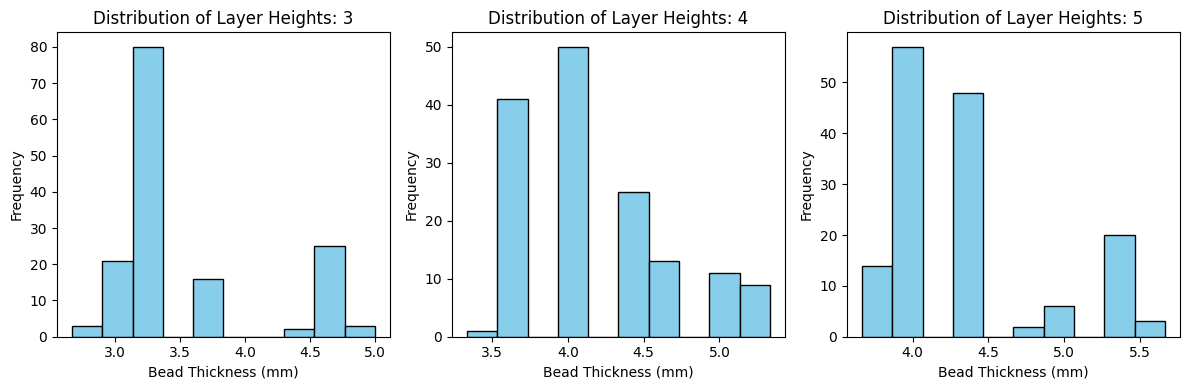

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Example layer heights (mm) for different regions in a layer
# Birinci katmanın 200 saniyelik değişimi

# Katman 3:
layer_height3 = np.array([
    [14,14,14,14,14,14,13,14,14,13,14,14,14,14,14,14,14,14,14,14,15,14,15,14,15,14,14,14,14,14],
    [11,10,9,10,11,10,10,10,10,10,10,10,10,10,10,10,11,10,10,11,11,10,10,11,11,10,9,11,10,11],
    [10,10,8,9,11,10,9,10,10,10,9,10,10,10,9,10,10,10,10,10,11,11,10,10,10,11,10,11,11,10],
    [10,10,8,9,10,9,9,10,10,10,9,10,10,10,9,10,10,10,10,10,11,10,9,10,10,10,10,10,10,10],
    [10,10,8,9,10,9,9,9,10,10,9,10,10,10,9,9,10,10,10,10,9,9,10,10,10,10,10,10,10,10]])

layer_height3 = layer_height3 * (1 / 3)  ## mm to pixel conversion

# Katman 4:

layer_height4 = np.array([
    [16,15,15,14,15,16,15,15,15,14,14,15,14,14,14,14,14,15,14,14,15,16,16,16,16,16,16,15,15,16],  #1.layers
    [11,12,13,11,12,12,12,12,11,12,12,12,12,13,13,12,11,14,13,12,12,13,14,12,12,13,13,12,12,13],  #3.layers
    [11,12,12,11,11,12,12,11,11,12,12,12,12,12,13,11,11,13,13,12,11,13,14,11,12,12,13,12,11,13],  #5.layers
    [11,12,12,11,11,12,12,11,11,11,12,11,11,12,13,11,12,13,13,12,11,13,13,11,12,12,13,12,11,13],
    [11,12,13,11,10,12,12,11,11,11,12,11,11,12,13,11,11,12,12,11,11,12,13,11,11,12,13,11,11,12]]) #7.layers
layer_height4 = layer_height4 * (1 / 3)  ## mm to pixel conversion

# Katman 5:

layer_height5 = np.array([
    [16,16,16,17,16,16,  15,15,14,15,15,16,  16,15,15,16,16,16,  16,16,16,16,16,16,  17,16,16,17,16,16],  #1.layers
    [13,12,12,13,13,12,  11,12,13,12,12,13,  12,12,12,13,14,12,  12,13,13,13,13,13,  13,12,13,13,13,13],  #3.layers
    [13,12,11,12,12,13,  11,12,13,12,12,13,  12,12,12,13,13,12,  12,13,13,13,13,13,  13,12,13,13,13,13],  #5.layers
    [12,12,11,11,12,12,  11,12,12,11,12,13,  12,12,11,12,13,12,  12,12,13,13,12,13,  13,12,12,13,13,13],
    [12,12,11,11,11,12,  11,12,12,12,12,12,  11,12,11,12,13,12,  12,13,12,12,12,13,  13,12,12,13,13,13]]) #7.layers
layer_height5 = layer_height5 * (1 / 3)  ## mm to pixel conversion

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation (already provided in your code)

# Plotting all three layers in one figure
fig, axs = plt.subplots(3, 1, figsize=(16, 18))  # 3 rows, 1 column
labels = ['layer3', 'layer4', 'layer5']


for i, layer in enumerate([layer_height3, layer_height4, layer_height5]):
    # Heatmap for each layer
    heatmap = sns.heatmap(layer, annot=True, cmap="coolwarm", cbar_kws={'label': 'Bead Thickness (mm)'}, ax=axs[i])
    #axs[i].set_title(f'Bead Thickness Variations Across Layer {i + 3}')
    axs[i].set_xlabel(labels[i])

    # Modify y-axis labels
    y_labels = [25, 75, 125, 175, 225]
    num_rows = layer.shape[0]  # Get the number of rows in the heatmap data
    tick_positions = np.linspace(0, num_rows - 1, len(y_labels))  # Evenly spaced tick positions
    tick_positions += 0.5  # Shift the tick positions slightly down (adjust 0.2 as needed)
    axs[i].set_yticks(tick_positions)
    axs[i].set_yticklabels(y_labels, va='center')  # Center the labels vertically

    # Add "Time (s)" label to the y-axis
    axs[i].set_ylabel('Time (s)')
    # Adjust spacing between subplots
    fig.tight_layout()

# Calculate statistics for all layers for reference (but we'll only display for layer_height4 as an example)
mean_height = np.mean(layer_height4)
std_dev_height = np.std(layer_height4)
cv_height = (std_dev_height / mean_height) * 100

print(f"Mean Height (Layer 4): {mean_height:.2f} mm")
print(f"Standard Deviation (Layer 4): {std_dev_height:.2f} mm")
print(f"Coefficient of Variation (Layer 4): {cv_height:.2f}%")

# Note: For extreme fluctuations, you might want to adjust or compute for each layer individually if needed

plt.show()

# If you still want to see the histogram, you can add another subplot or separate plot:
plt.figure(figsize=(12, 4))
for i, layer in enumerate([layer_height3, layer_height4, layer_height5]):
    plt.subplot(1, 3, i + 1)
    plt.hist(layer.flatten(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Layer Heights: {i + 3}')
    plt.xlabel('Bead Thickness (mm)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('heatmap_figure_Bead Fluctuations.png')

plt.show()

Mean Height (Layer 4): 4.17 mm
Standard Deviation (Layer 4): 0.49 mm
Coefficient of Variation (Layer 4): 11.77%


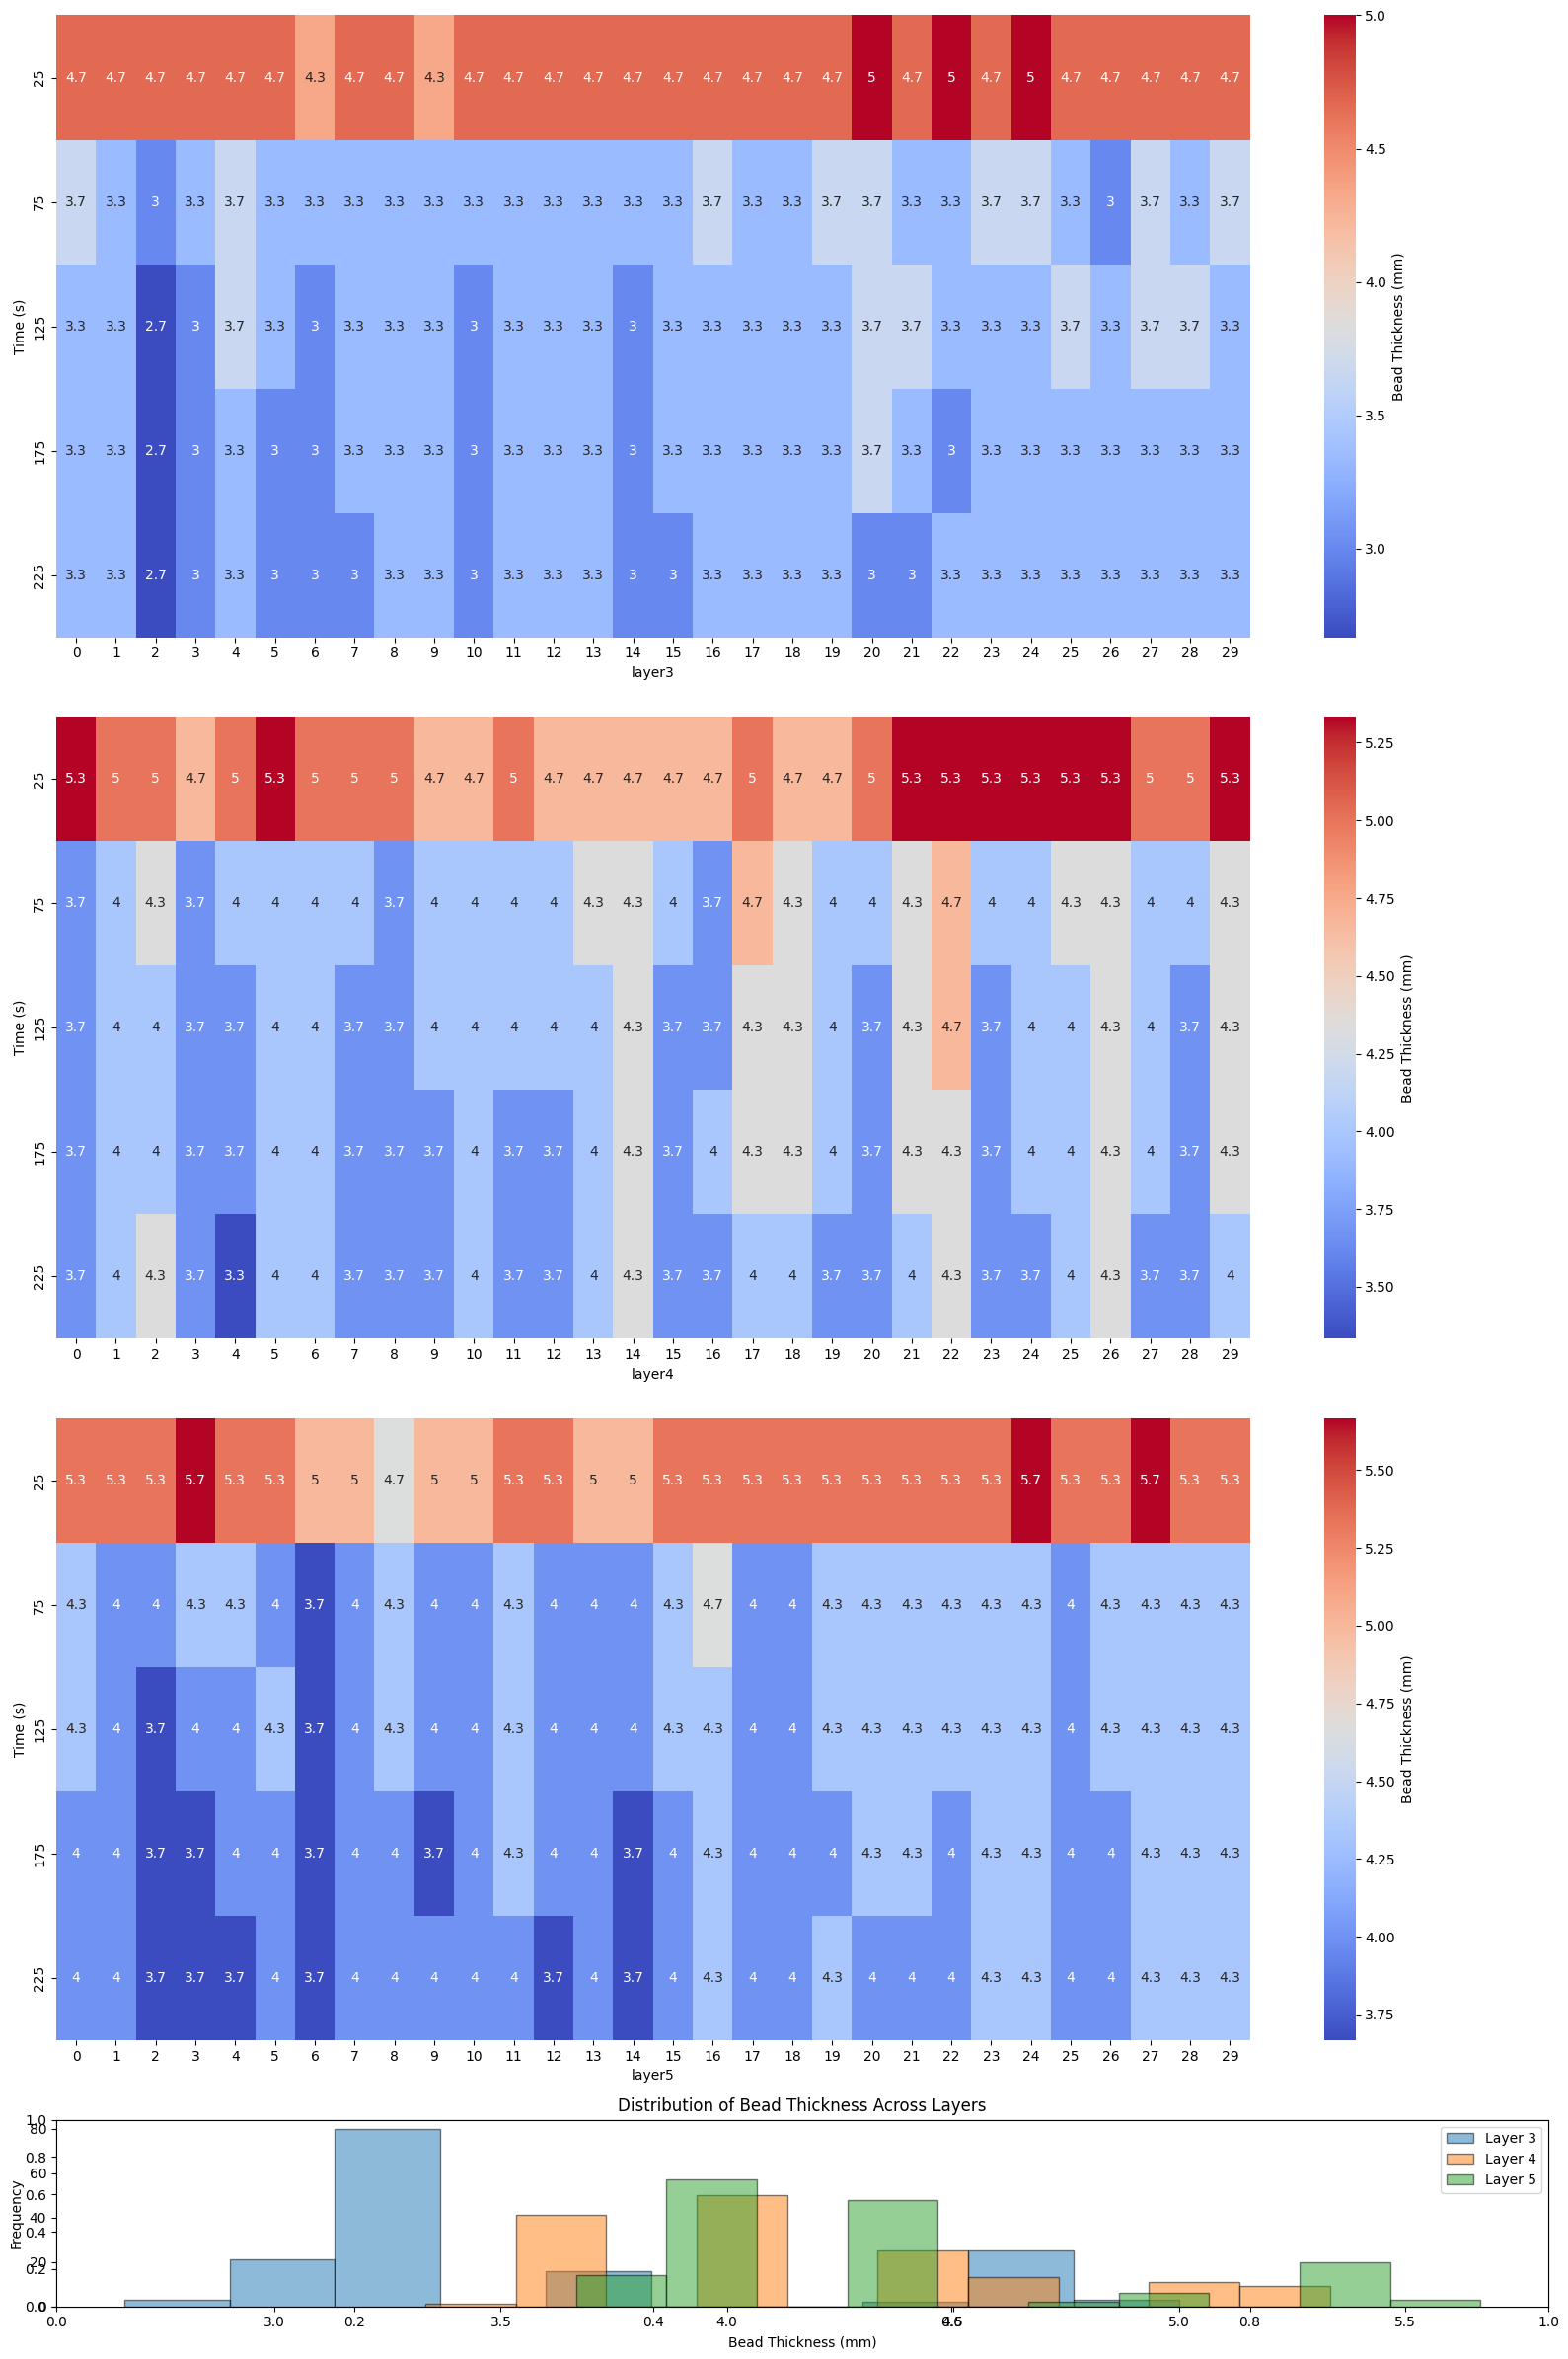

In [13]:
# Set up the figure with enough space for both heatmaps and histograms
fig, axs = plt.subplots(4, 1, figsize=(16, 24), gridspec_kw={'height_ratios': [1, 1, 1, 0.3]})  # 4 rows, 1 column

labels = ['layer3', 'layer4', 'layer5']

for i, layer in enumerate([layer_height3, layer_height4, layer_height5]):
    # Heatmap for each layer
    heatmap = sns.heatmap(layer, annot=True, cmap="coolwarm", cbar_kws={'label': 'Bead Thickness (mm)'}, ax=axs[i])
    axs[i].set_xlabel(labels[i])
    axs[i].set_ylabel('Time (s)')

    # Modify y-axis labels
    y_labels = [25, 75, 125, 175, 225]
    num_rows = layer.shape[0]  # Get the number of rows in the heatmap data
    tick_positions = np.linspace(0, num_rows - 1, len(y_labels))  # Evenly spaced tick positions
    tick_positions += 0.5  # Shift the tick positions slightly down (adjust 0.2 as needed)
    axs[i].set_yticks(tick_positions)
    axs[i].set_yticklabels(y_labels, va='center')  # Center the labels vertically

# Histogram subplot
axs[-1] = plt.subplot2grid((4, 1), (3, 0), colspan=1)  # Use subplot2grid for finer control
for i, layer in enumerate([layer_height3, layer_height4, layer_height5]):
    axs[-1].hist(layer.flatten(), bins=10, alpha=0.5, label=f'Layer {i+3}', edgecolor='black')
axs[-1].set_xlabel('Bead Thickness (mm)')
axs[-1].set_ylabel('Frequency')
axs[-1].legend(loc='upper right')
axs[-1].set_title('Distribution of Bead Thickness Across Layers')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig('heatmap_and_histogram_combined_Bead_Fluctuations.png', dpi=300, bbox_inches='tight')

# If you're in an interactive environment and want to see the plot:
# plt.show()

# Print stats (optional, for reference)
mean_height = np.mean(layer_height4)
std_dev_height = np.std(layer_height4)
cv_height = (std_dev_height / mean_height) * 100

print(f"Mean Height (Layer 4): {mean_height:.2f} mm")
print(f"Standard Deviation (Layer 4): {std_dev_height:.2f} mm")
print(f"Coefficient of Variation (Layer 4): {cv_height:.2f}%")